<a href="https://colab.research.google.com/github/Madhavevolve/CV/blob/main/exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
## Exercise Sheet 1: Imaging
### Erhardt Barth / Christoph Linse / Manuel Laufer / Kathleen Anderson
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{erhardt.barth, c.linse, m.laufer, k.anderson} @uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Akshat Ashish Philip (801814)
2. Madhav Devnarayan    (802046)
3. Nahush Desai         (802059)
4. yuvamani suriakumar  (803100)
5.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

In [2]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

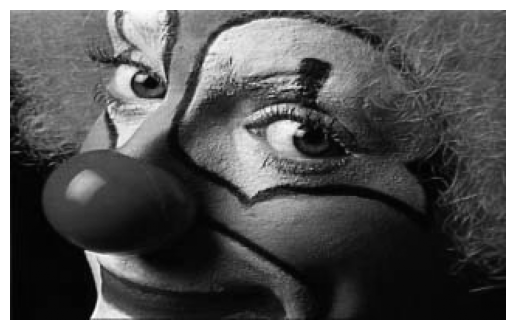

In [19]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('/content/drive/MyDrive/clown.png')


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()


## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function.

In [ ]:
def load_gray_normalized(image_path):
    pass

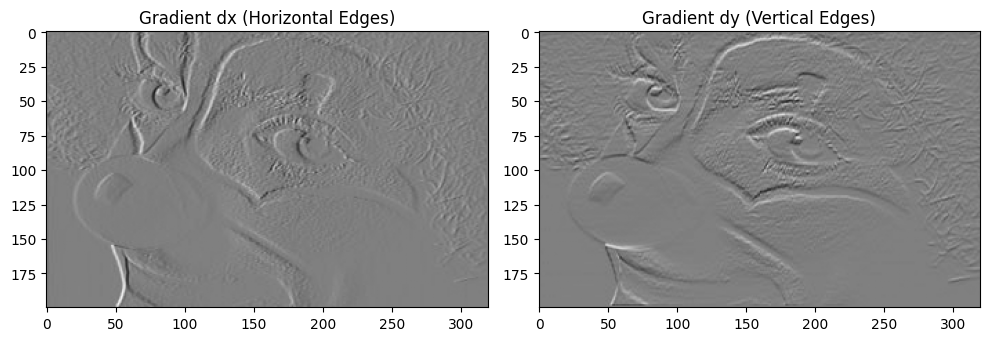

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_gray_normalized(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_normalized = img_gray.astype(np.float32) / 255.0
    return img_normalized


img = load_gray_normalized('/content/drive/MyDrive/clown.png')


kernel_dx = np.array([[-1, 0, 1]], dtype=np.float32)
kernel_dy = kernel_dx.T


dx = cv2.filter2D(img, -1, kernel_dx)
dy = cv2.filter2D(img, -1, kernel_dy)

# Show both gradient results side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(dx, cmap='gray', vmin= -1, vmax=1)
axes[0].set_title('Gradient dx (Horizontal Edges)')
axes[0].axis('on')

axes[1].imshow(dy, cmap='gray', vmin=-1, vmax=1)
axes[1].set_title('Gradient dy (Vertical Edges)')
axes[1].axis('on')

plt.tight_layout()
plt.show()


## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`,
then load and display them.  
Both images illustrate two commonly encountered problems in photography.
Underexposed (overexposed) images are darker (brighter) than they should be,
because they have been exposed to too little (too much) light.

Compute and display the histograms (`plt.hist`,`np.flatten`) of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed.

These defects can be corrected by remapping the pixel values to achieve a
more evenly distributed range of pixel intensities.
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8` to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[1,255]$ (why not $[0, 255]$?, `np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

In [ ]:
def display_with_hist(image):
    pass

In [ ]:
def normalized_to_uint8(image):
    pass

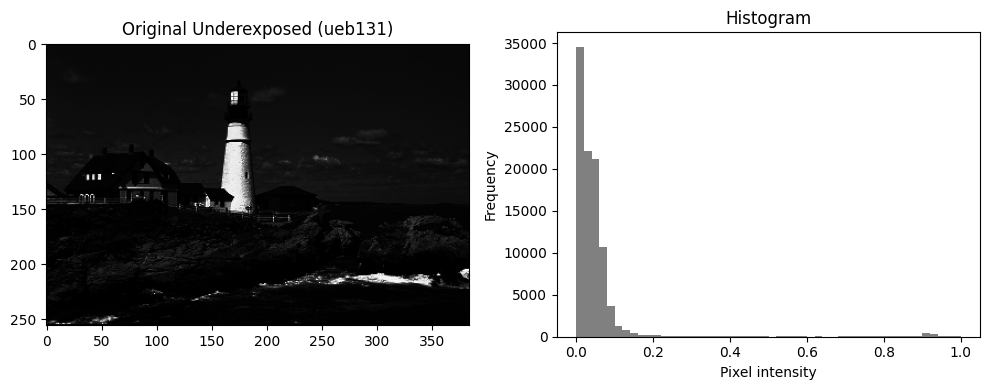

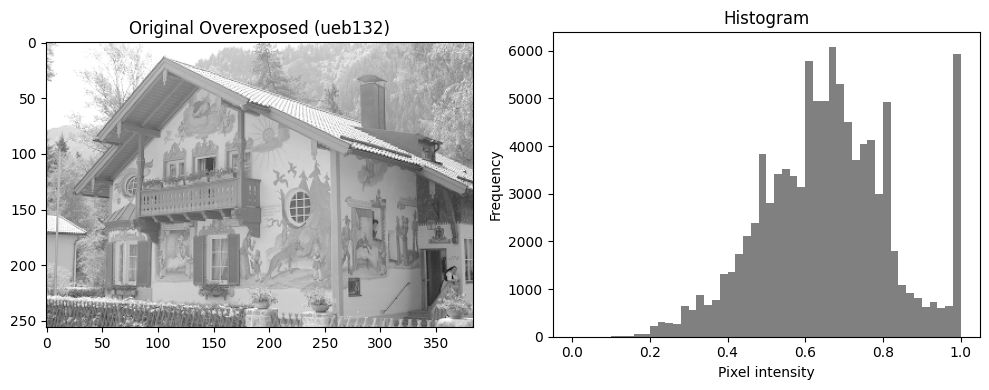

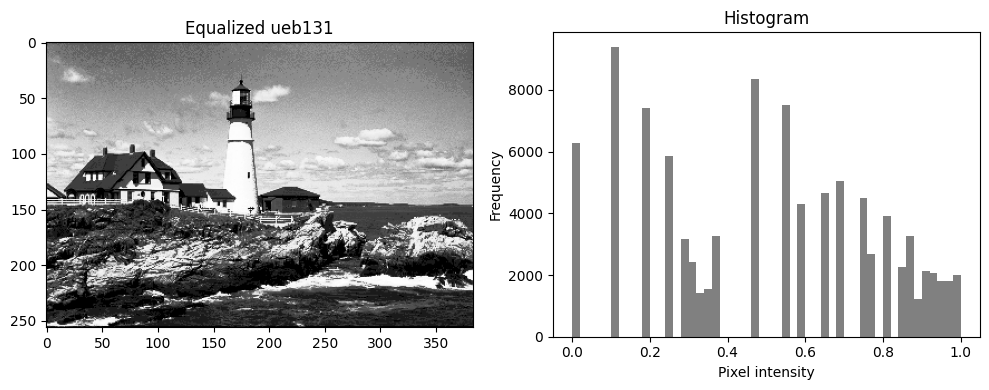

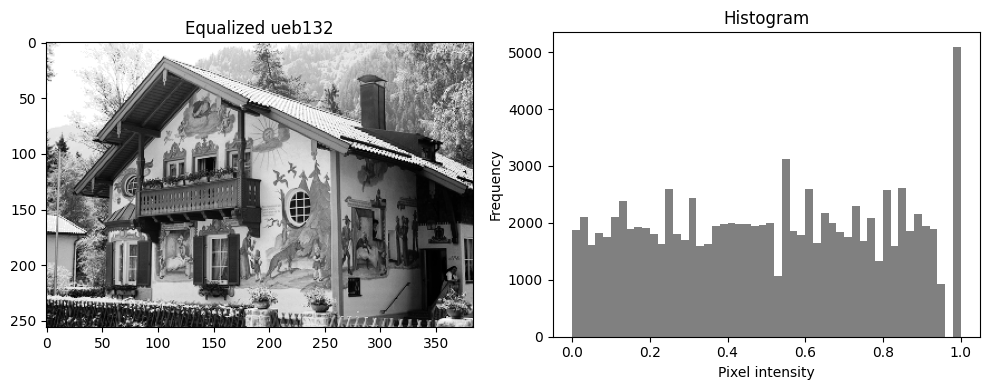

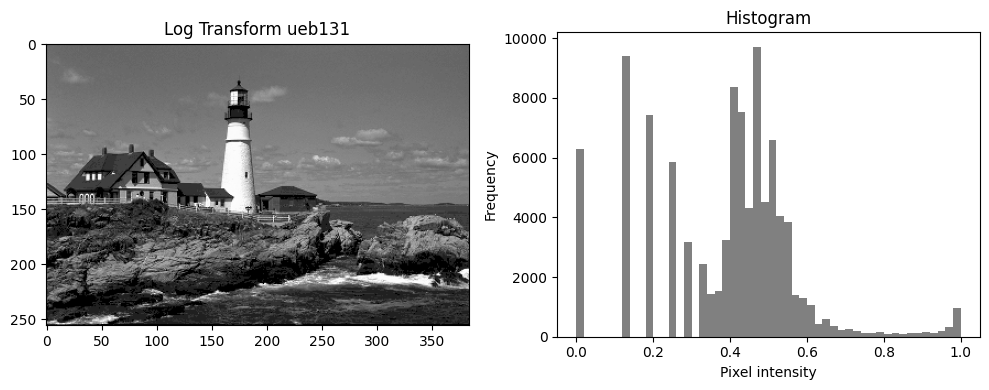

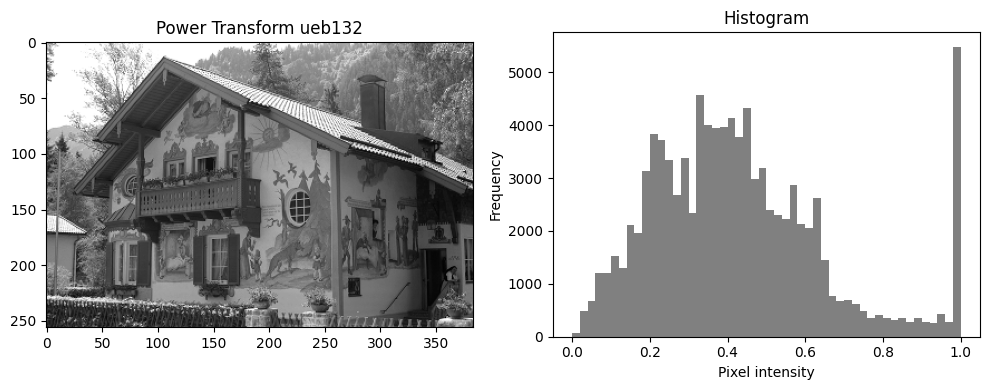

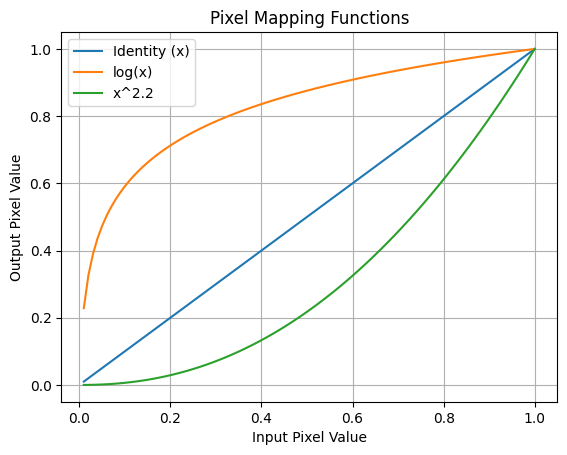

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_gray_normalized(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img.astype(np.float32) / 255.0

# 2. Display image and histogram side by side
def display_with_hist(image, title='Image'):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(title)
    axs[0].axis('on')

    axs[1].hist(image.flatten(), bins=50, range=(0, 1), color='gray')
    axs[1].set_title('Histogram')
    axs[1].set_xlabel('Pixel intensity')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# 3. Convert normalized image to uint8 for OpenCV
def normalized_to_uint8(image):
    return (image * 255).clip(0, 255).astype(np.uint8)

# 4. Logarithmic transform (brightens dark areas)
def log_transform(image):
    return np.log1p(image * 255) / np.log(256)

# 5. Power transform (darkens bright areas or brightens dark ones depending on gamma)
def power_transform(image, gamma):
    return np.power(image, gamma)

# 6. Load images
img1 = load_gray_normalized('/content/drive/MyDrive/ueb131.png')  # Underexposed
img2 = load_gray_normalized('/content/drive/MyDrive/ueb132.png')  # Overexposed

# 7. Display original images with histograms
display_with_hist(img1, title='Original Underexposed (ueb131)')
display_with_hist(img2, title='Original Overexposed (ueb132)')

# 8. Histogram equalization (requires uint8)
img1_eq = cv2.equalizeHist(normalized_to_uint8(img1)) / 255.0
img2_eq = cv2.equalizeHist(normalized_to_uint8(img2)) / 255.0

display_with_hist(img1_eq, title='Equalized ueb131')
display_with_hist(img2_eq, title='Equalized ueb132')

# 9. Log and Power Transforms
log_img1 = log_transform(img1)                      # Fix underexposed
power_img2 = power_transform(img2, gamma=2.2)       # Fix overexposed

display_with_hist(log_img1, title='Log Transform ueb131')
display_with_hist(power_img2, title='Power Transform ueb132')

# 10. Show transformation functions
x_vals = np.linspace(0.01, 1, 100)
log_vals = np.log1p(x_vals * 255) / np.log(256)
power_vals = np.power(x_vals, 2.2)

plt.plot(x_vals, x_vals, label='Identity (x)')
plt.plot(x_vals, log_vals, label='log(x)')
plt.plot(x_vals, power_vals, label='x^2.2')
plt.title('Pixel Mapping Functions')
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# TODO: convert images to uint8

# TODO: equalize histogram and display


In [ ]:
# TODO: display logarithmic function

# TODO: display quadratic function


In [ ]:
# TODO: transform and display ueb131.png


In [ ]:
# TODO: transform and display ueb132.png
